In [1]:
!date

Tue Sep 17 08:46:39 EDT 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [9]:
import ants

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
df = pd.read_csv('../data_legend.csv',index_col=None)
df

,Unnamed: 0,subID,eventName,taskID,filename,fn_func,nscans,has_anat,anat_fn
0,12,NDARINVHRTU9HVX,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20180627143332.tgz,NDARINVHRTU9HVX_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVH...
1,91,NDARINVHRTU9HVX,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20180627143852.tgz,NDARINVHRTU9HVX_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVH...
2,25,NDARINVJPMRY00B,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20170626132339.tgz,NDARINVJPMRY00B_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVJ...
3,43,NDARINVJPMRY00B,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20170626131814.tgz,NDARINVJPMRY00B_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVJ...
4,17,NDARINVKK5BJGB6,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20180729125923.tgz,NDARINVKK5BJGB6_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVK...
5,93,NDARINVKK5BJGB6,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20180729125406.tgz,NDARINVKK5BJGB6_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVK...
6,54,NDARINVN9D4XZKE,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20171220161325.tgz,NDARINVN9D4XZKE_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVN...
7,87,NDARINVN9D4XZKE,baselineYear1Arm1,ABCD-MPROC-nBack-fMRI,20171220161842.tgz,NDARINVN9D4XZKE_baselineYear1Arm1_ABCD-MPROC-n...,2,True,../../BC-ABCD-ADHD/Data/ABCD-anat/sub-NDARINVN...


In [14]:
unique_subs = pd.unique(df['subID'].values)
unique_subs = unique_subs[1::]

In [15]:
unique_subs

array(['NDARINVJPMRY00B', 'NDARINVKK5BJGB6', 'NDARINVN9D4XZKE'],
      dtype=object)

In [16]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [17]:
fn_temp = '../Data/020-fmriprepped/sub-{sub}/ses-baselineYear1Arm1/func/sub-{sub}_ses-baselineYear1Arm1_task-nback_run-01_space-MNI152NLin2009cAsym_res-2_boldref.nii.gz'

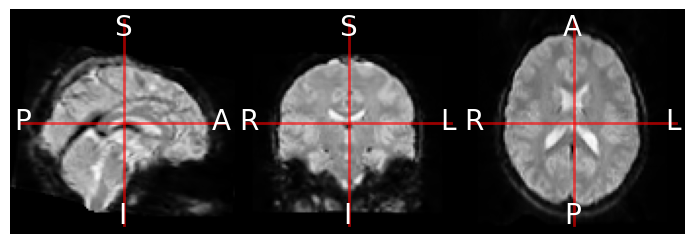

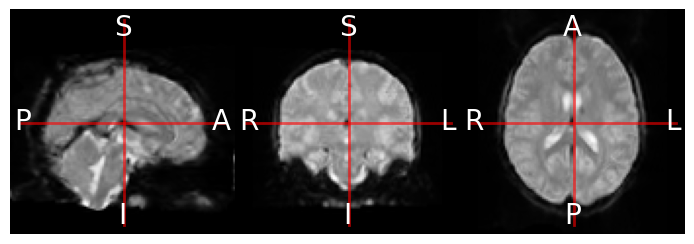

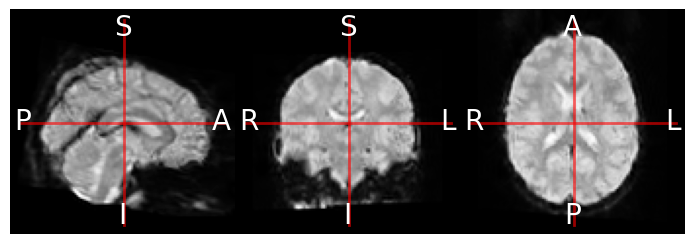

In [24]:
for s in range(3):
    sub = unique_subs[s]
    fn = fn_temp.format(sub=sub)
    assert os.path.exists(fn)
    im = ants.image_read(fn)
    im.plot_ortho(flat=True)